In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest,f_regression,RFE



In [2]:
Data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df = pd.DataFrame(Data)

In [4]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:

df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:

df.duplicated().sum()

0

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
num_df = df.select_dtypes(include=['int64', 'float64'])

skewness = num_df.skew()
kurtosis = num_df.kurt()

In [11]:
skewness

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [12]:
kurtosis

car_ID             -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64

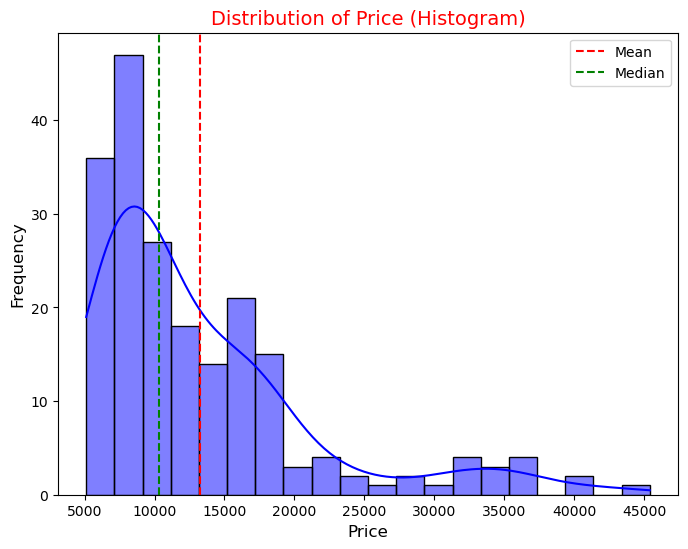

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20, color='blue')
plt.title('Distribution of Price (Histogram)', fontsize=14,color='red')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.show()

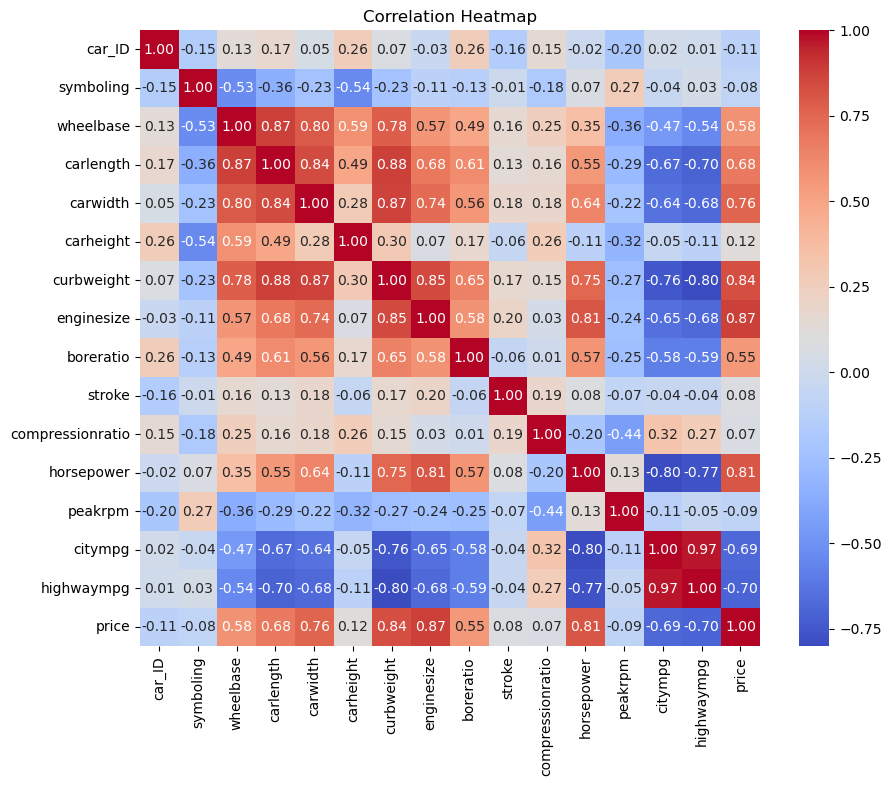

In [26]:
correlation_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

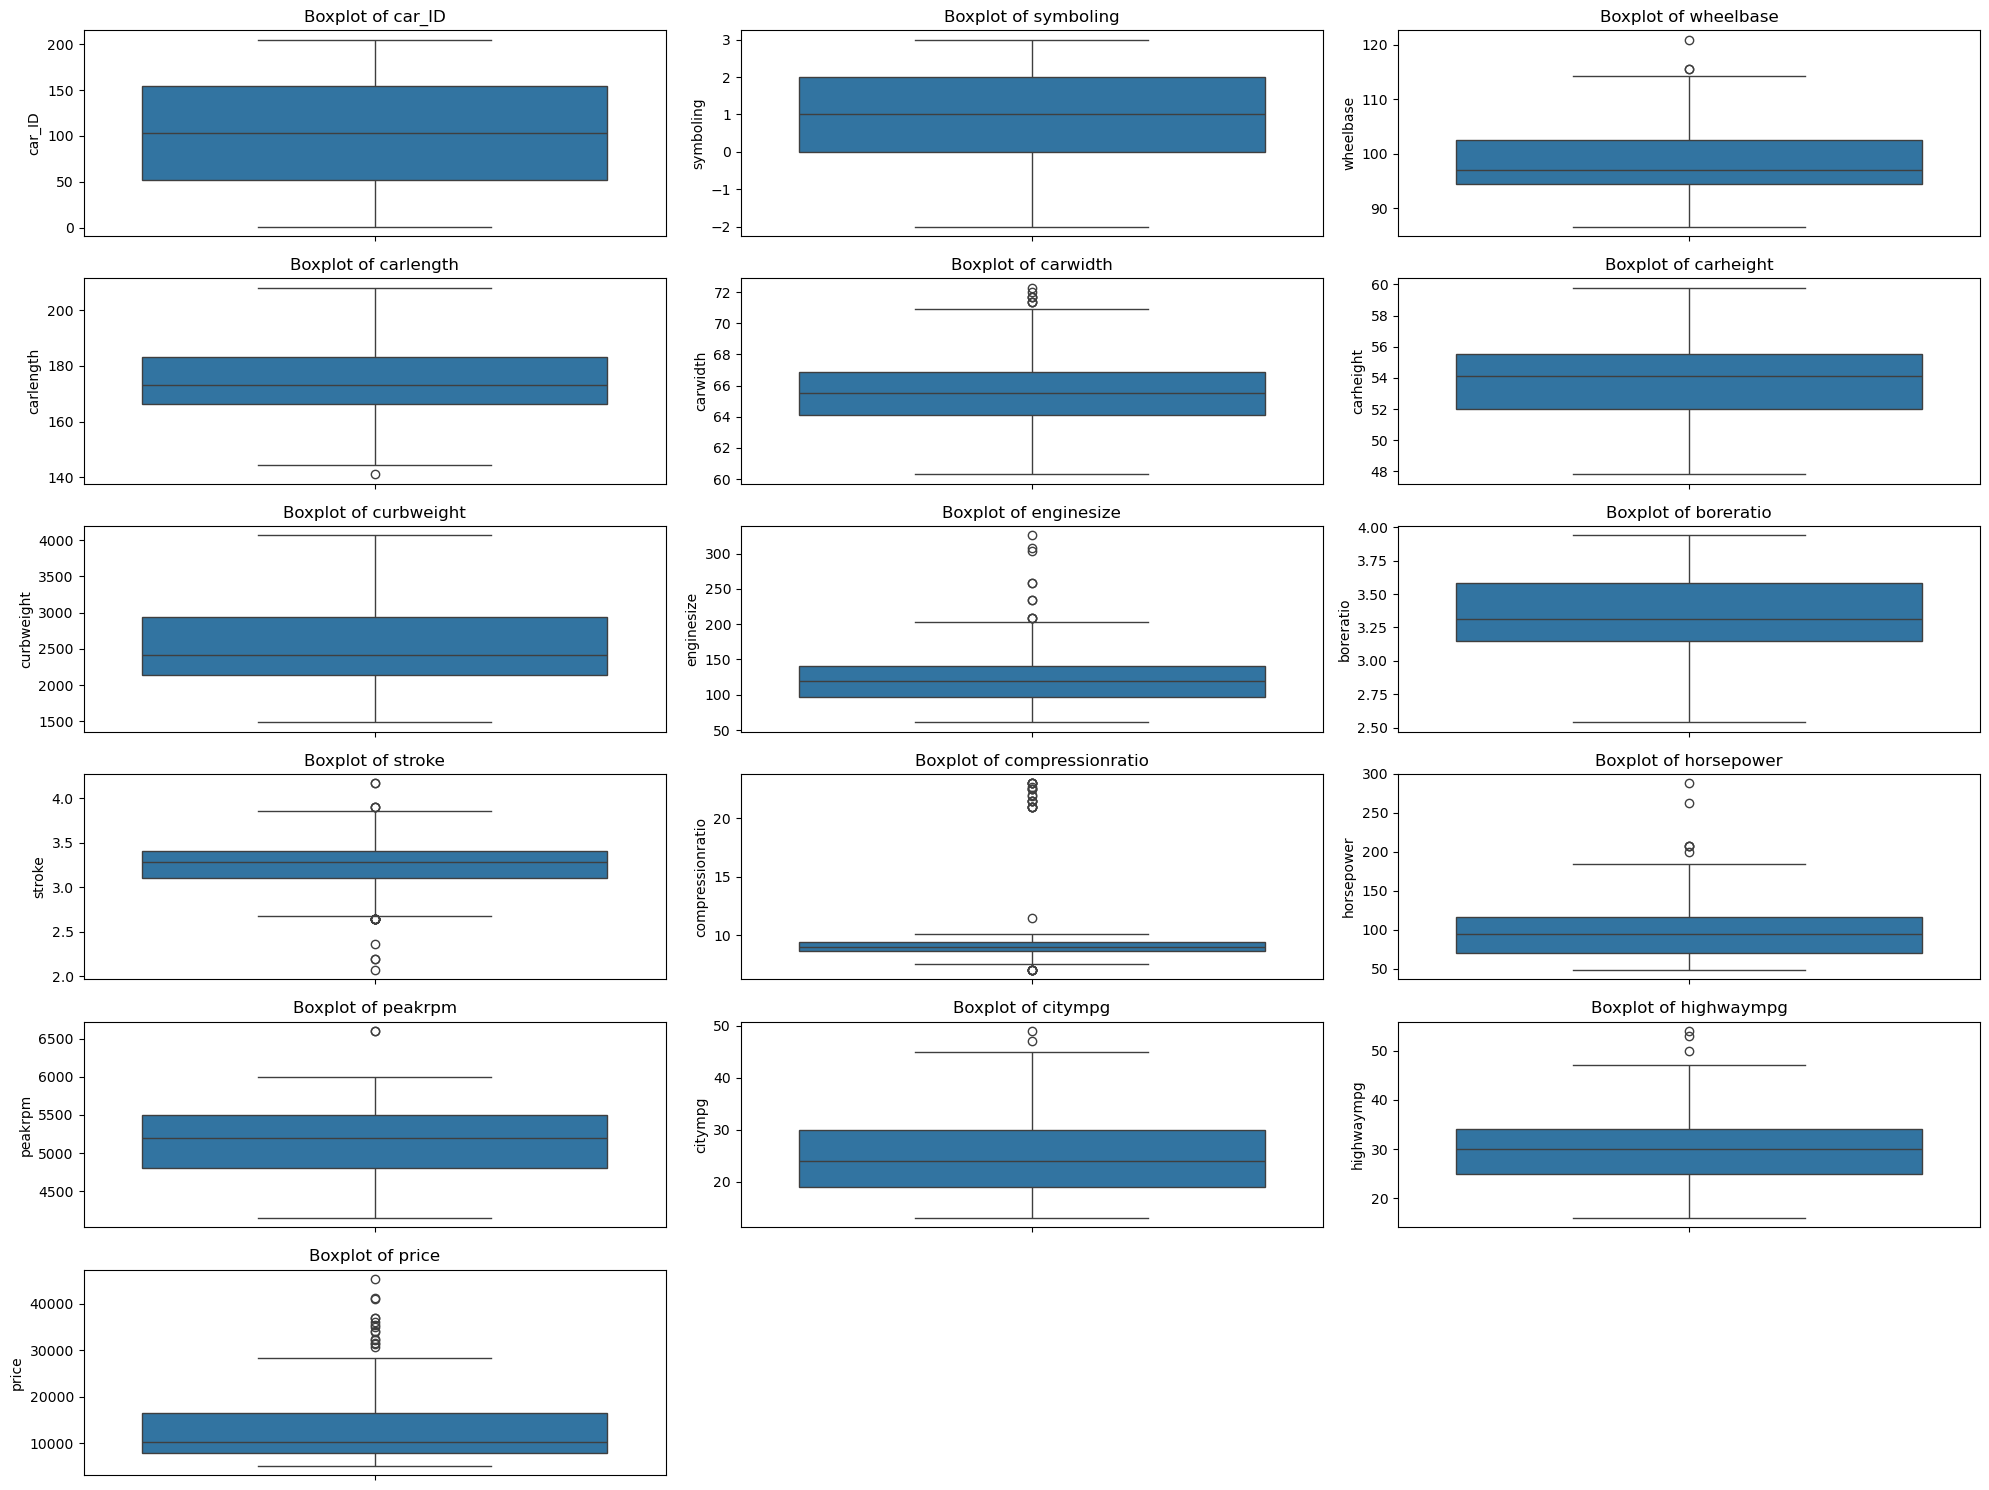

In [28]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Set up the plot size
plt.figure(figsize=(20, 15))
# Loop through each numerical column and draw a boxplot
for i, column in enumerate(numerical_columns, 1):
 plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
 sns.boxplot(data=df, y=column)
 plt.title(f"Boxplot of {column}")
 plt.tight_layout()
plt.show()

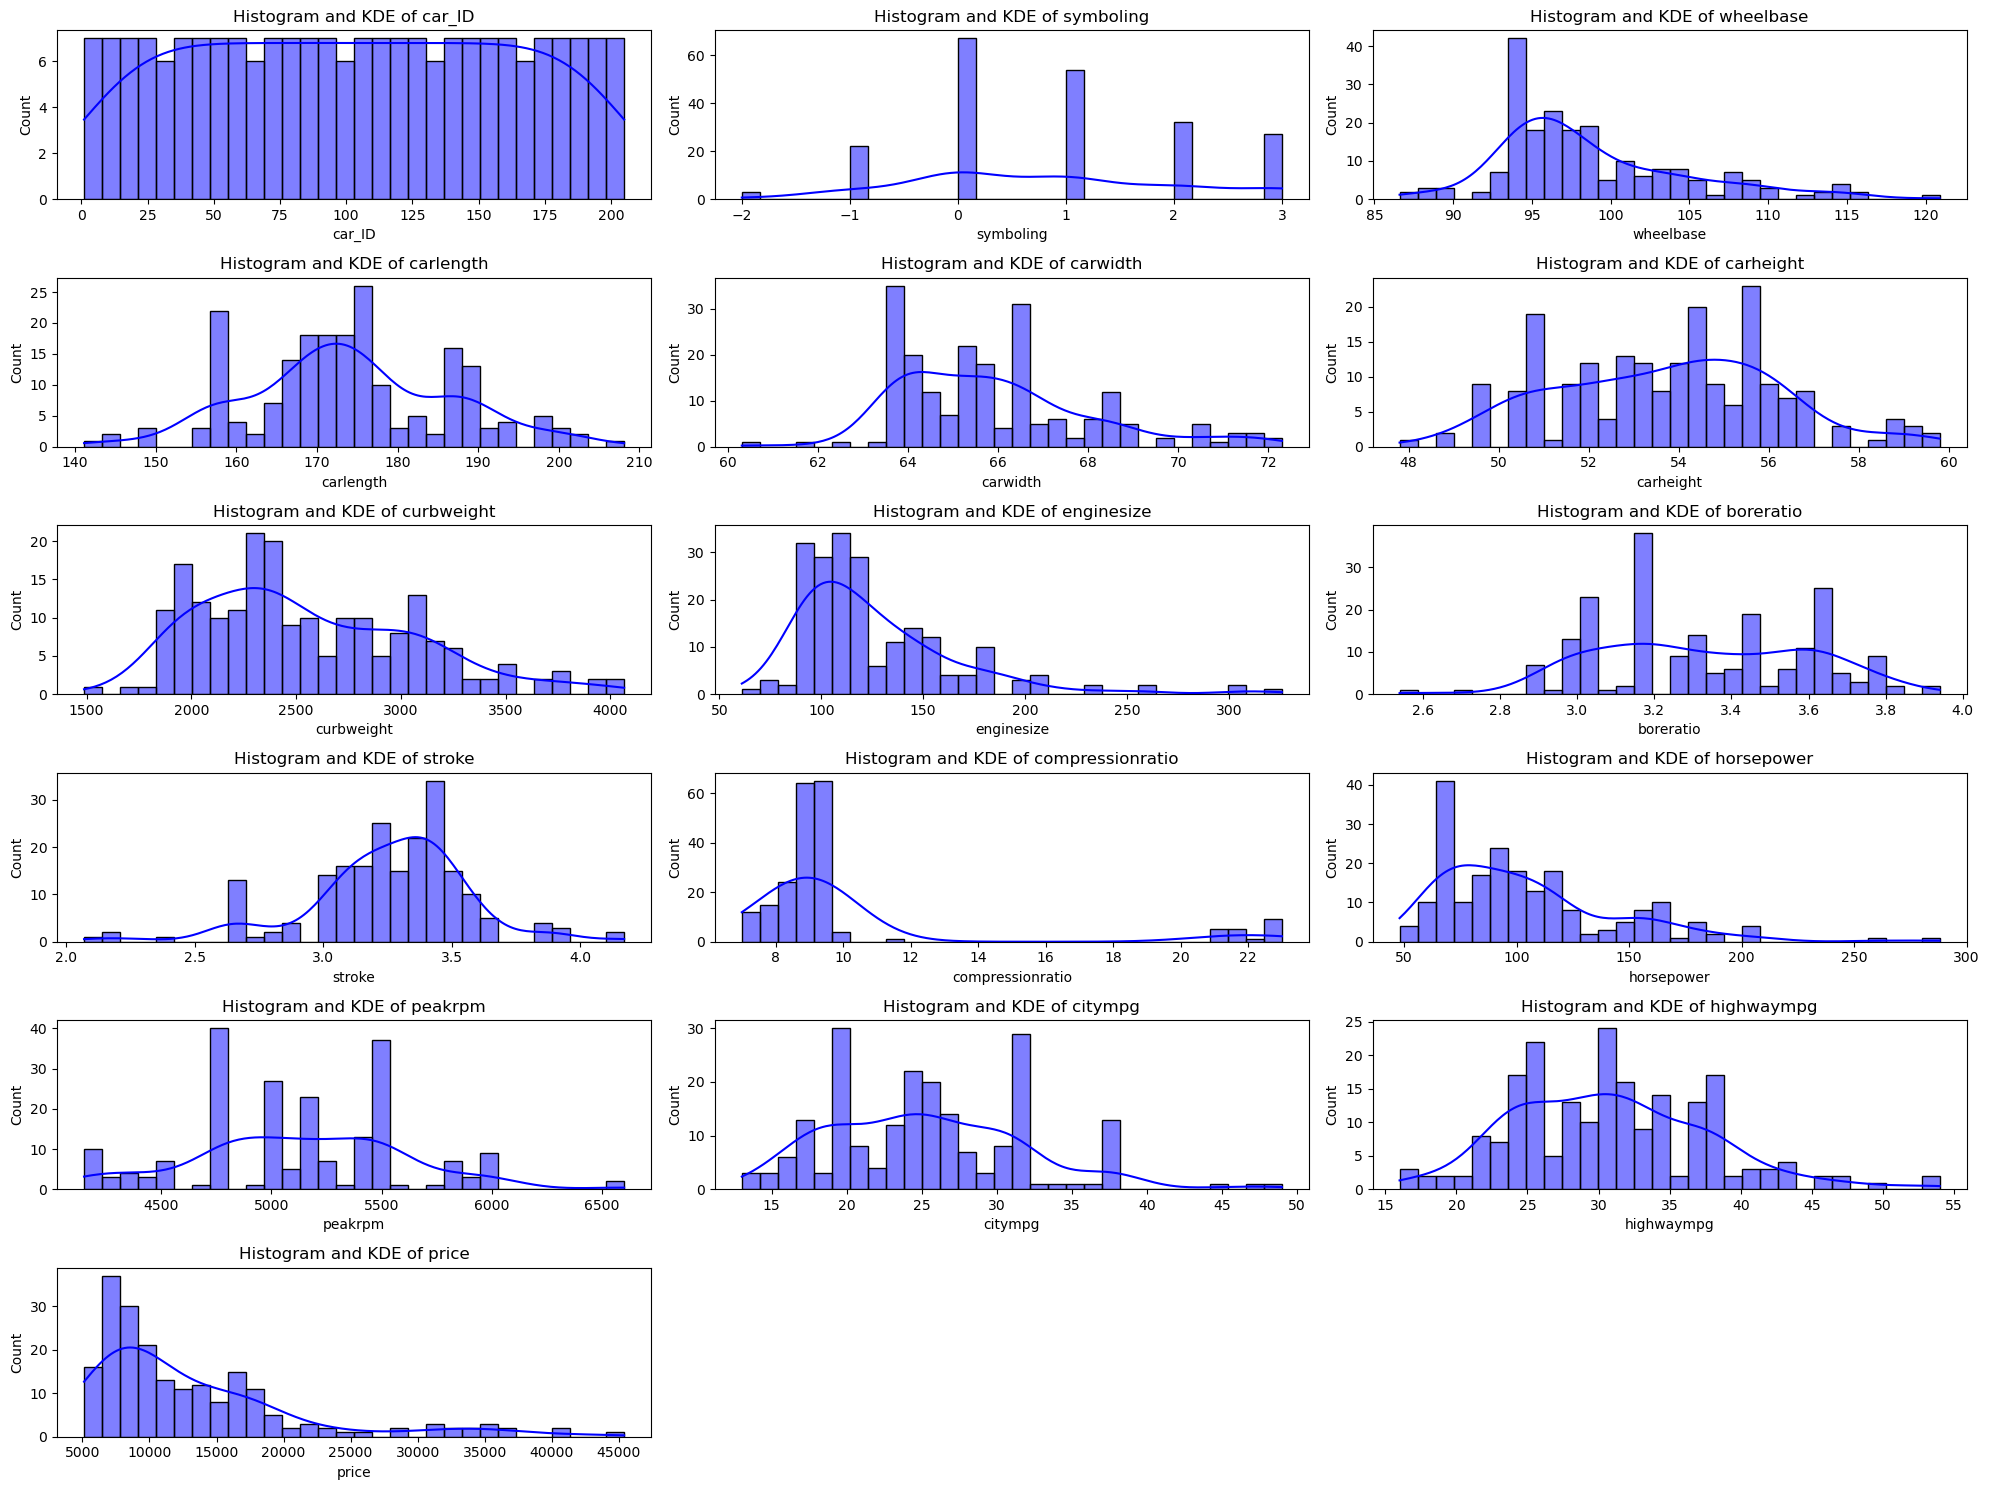

In [29]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Set up the plot size
plt.figure(figsize=(20, 15))
# Loop through each numerical column and draw a histogram with KDE
for i, column in enumerate(numerical_columns, 1):
 plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
 sns.histplot(data=df, x=column, kde=True, color='blue', bins=30)
 plt.title(f"Histogram and KDE of {column}")
 plt.tight_layout()
plt.show()


In [31]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [32]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Detect outliers using IQR for each column
for col in numerical_columns:
 Q1 = df[col].quantile(0.25)
 Q3 = df[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR

 # Count outliers
 outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
 print(f"Column: {col}, Outliers: {len(outliers)}")

Column: car_ID, Outliers: 0
Column: symboling, Outliers: 0
Column: wheelbase, Outliers: 3
Column: carlength, Outliers: 1
Column: carwidth, Outliers: 8
Column: carheight, Outliers: 0
Column: curbweight, Outliers: 0
Column: enginesize, Outliers: 10
Column: boreratio, Outliers: 0
Column: stroke, Outliers: 20
Column: compressionratio, Outliers: 28
Column: horsepower, Outliers: 6
Column: peakrpm, Outliers: 2
Column: citympg, Outliers: 2
Column: highwaympg, Outliers: 3
Column: price, Outliers: 15


In [33]:
# Create a cleaned dataset
df_cleaned = df.copy()
# List of columns to check for outliers
columns_with_outliers = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke','compressionratio', 'horsepower', 'price']
# Capping outliers
for column in columns_with_outliers:
 Q1 = df_cleaned[column].quantile(0.25)
 Q3 = df_cleaned[column].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 # Cap the outliers
 df_cleaned[column] = df_cleaned[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x> upper_bound else x)

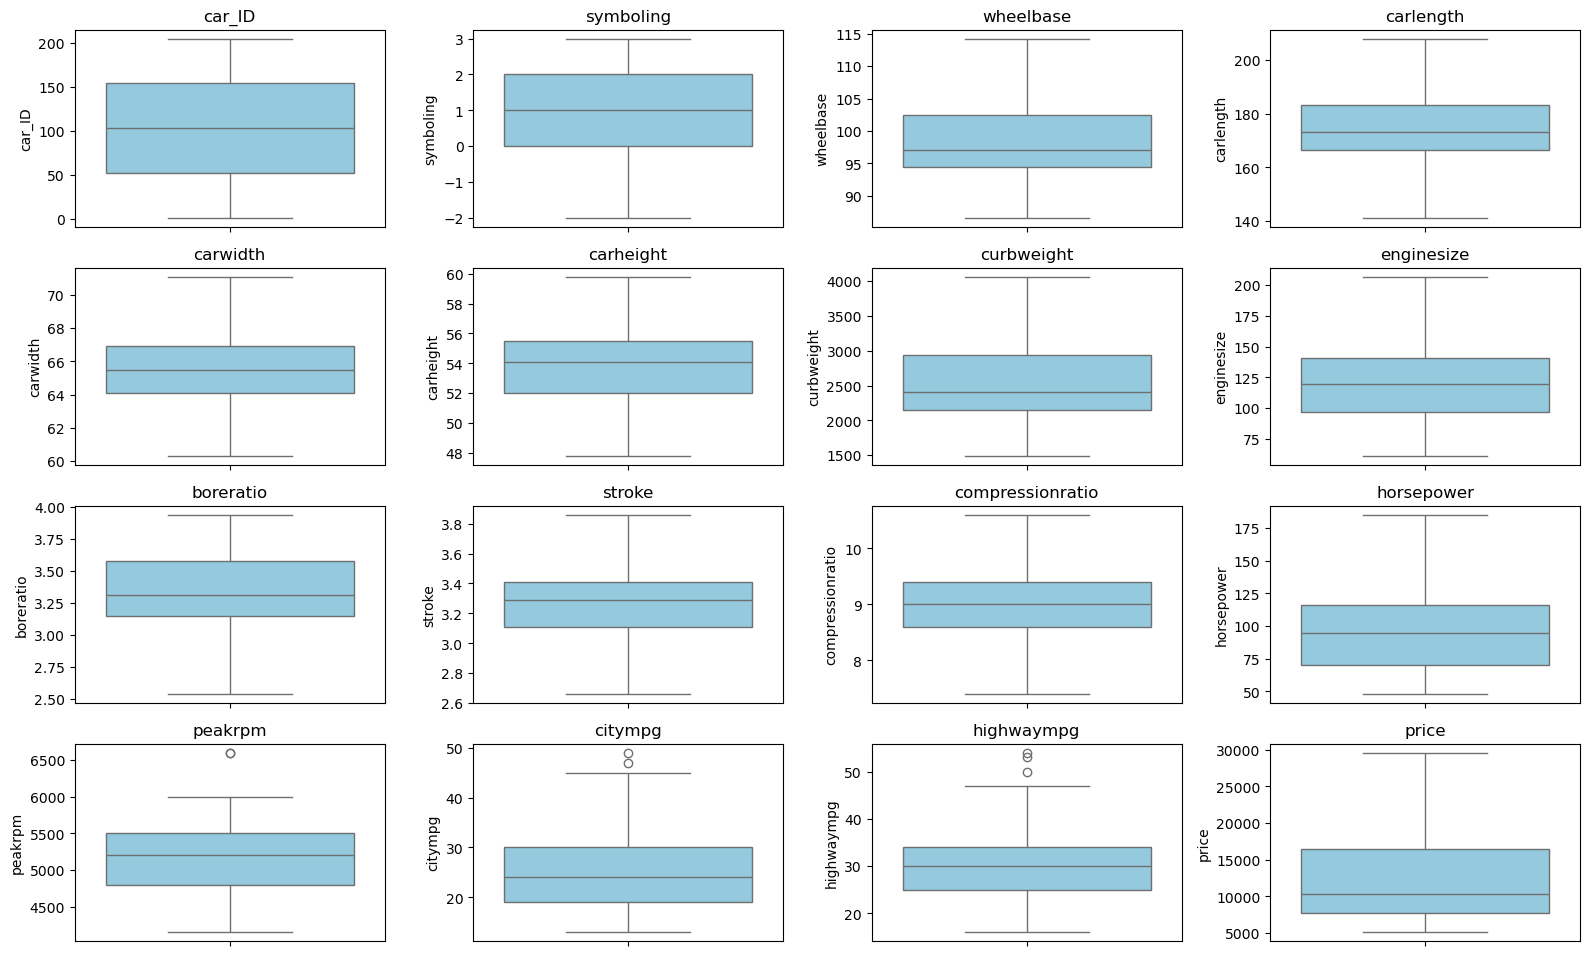

In [36]:
# Set up the figure size
plt.figure(figsize=(16, 12))
# Create boxplots for all numeric columns in df_cleaned
for i, column in enumerate(df_cleaned.select_dtypes(include='number').columns, 1):
 plt.subplot(5, 4, i) # Create a grid of subplots (adjust rows/cols as needed)
 sns.boxplot(y=df_cleaned[column], color='skyblue')
 plt.title(column)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
# Encoding

In [37]:
# Creating a new dataframe df_cleaned based on the original df
df_cleaned = df.copy()
# Label encoding for the 'symboling' column (ordinal data)
label_encoder = LabelEncoder()
df_cleaned['symboling'] = label_encoder.fit_transform(df_cleaned['symboling'])
# One-Hot Encoding for categorical columns (nominal data)
df_cleaned = pd.get_dummies(df_cleaned, columns=['fueltype', 'aspiration', 'doornumber',
 'carbody', 'drivewheel', 'enginelocation','wheelbase','carlength','carwidth','carheight',
 'enginetype', 'cylindernumber', 'enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])

# Check the first few rows to confirm the encoding
df_cleaned.head()


,car_ID,symboling,CarName,curbweight,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,...,highwaympg_38,highwaympg_39,highwaympg_41,highwaympg_42,highwaympg_43,highwaympg_46,highwaympg_47,highwaympg_50,highwaympg_53,highwaympg_54
0,1,5,alfa-romero giulia,2548,13495.0,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,5,alfa-romero stelvio,2548,16500.0,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,alfa-romero Quadrifoglio,2823,16500.0,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,4,audi 100 ls,2337,13950.0,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,4,audi 100ls,2824,17450.0,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [76]:
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('price')  
scaler = StandardScaler()
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns]) 
X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

In [78]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['price']) # Features (all columns except 'price')
y = df_cleaned['price'] # Target variable ('price')

In [82]:
selector = SelectKBest(score_func=f_regression,k=20)
x_new = selector.fit_transform(X,y)


In [84]:
Selected_features = X.columns[selector.get_support()]
feature_score = pd.DataFrame({'features':X.columns,'score':selector.scores_}).sort_values(by = 'score',ascending = False)

In [86]:
print("Selected Features:", Selected_features)
print("\nFeature Scores:")
print(feature_score)

Selected Features: Index(['curbweight', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'enginesize_209', 'fuelsystem_2bbl',
       'fuelsystem_mpfi', 'boreratio_3.8', 'compressionratio_8.0',
       'horsepower_182', 'horsepower_184', 'peakrpm_4750', 'citympg_14',
       'citympg_16', 'highwaympg_16', 'highwaympg_25'],
      dtype='object')

Feature Scores:
                 features       score
2              curbweight  468.594431
249   cylindernumber_four  192.612277
16         drivewheel_rwd  140.059236
15         drivewheel_fwd  115.353549
303       fuelsystem_mpfi   74.082624
..                    ...         ...
382  compressionratio_7.5    0.000788
127       carlength_181.7    0.000774
443        horsepower_111    0.000100
227        carheight_55.7    0.000036
222        carheight_55.1    0.000006

[554 rows x 2 columns]


In [88]:
X_selected = X[Selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.fit_transform(X_test_selected)

In [92]:
# Initialize models
models={"Linear Regression":LinearRegression(),
 "Decision Tree Regressor":DecisionTreeRegressor(),
"Random Forest Regressor":RandomForestRegressor(),
"Gradient Boosting Regressor":GradientBoostingRegressor(),
"Support Vector Regressor":SVR()}

In [94]:
print("Training set shape (features):", X_train_scaled.shape) 
print("Test set shape (features):", X_test_scaled.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (164, 20)
Test set shape (features): (41, 20)
Training set shape (target): (164,)
Test set shape (target): (41,)


In [98]:
# MODEL EVALUATION
results={}       # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled,y_train)  
    # make the prediction
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R²": r2,}

In [100]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                      MSE          MAE         RMSE        R²
Linear Regression            9.542248e+06  2009.757898  3089.052863  0.879126
Decision Tree Regressor      1.518954e+07  2558.709341  3897.375512  0.807591
Random Forest Regressor      1.705659e+07  2498.787541  4129.962554  0.783941
Gradient Boosting Regressor  2.123520e+07  2517.967415  4608.166600  0.731009
Support Vector Regressor     8.670856e+07  5695.907738  9311.743165 -0.098355


In [102]:
# Finding Best model

In [104]:
best_model_name = max(results, key=lambda x: results[x]['R²'])  
best_model = models[best_model_name] 
print(f"The best model is: {best_model_name}")

The best model is: Linear Regression


In [106]:
# Feature selection

In [112]:
# Extract coefficients as feature importances
feature_importances = pd.Series(best_model.coef_, index=X.columns).sort_values(ascending=False)

# Display feature importances
print("Feature Importances (from coefficients):\n", feature_importances)


Feature Importances (from coefficients):
 fueltype_diesel     6.842782e+14
wheelbase_95.7      2.751550e+14
drivewheel_rwd      2.345453e+14
drivewheel_fwd      2.345453e+14
wheelbase_93.3      2.211978e+14
                        ...     
wheelbase_102.0    -4.578681e+14
doornumber_two     -1.114616e+15
doornumber_four    -1.114616e+15
aspiration_turbo   -1.118583e+15
aspiration_std     -1.118583e+15
Length: 554, dtype: float64


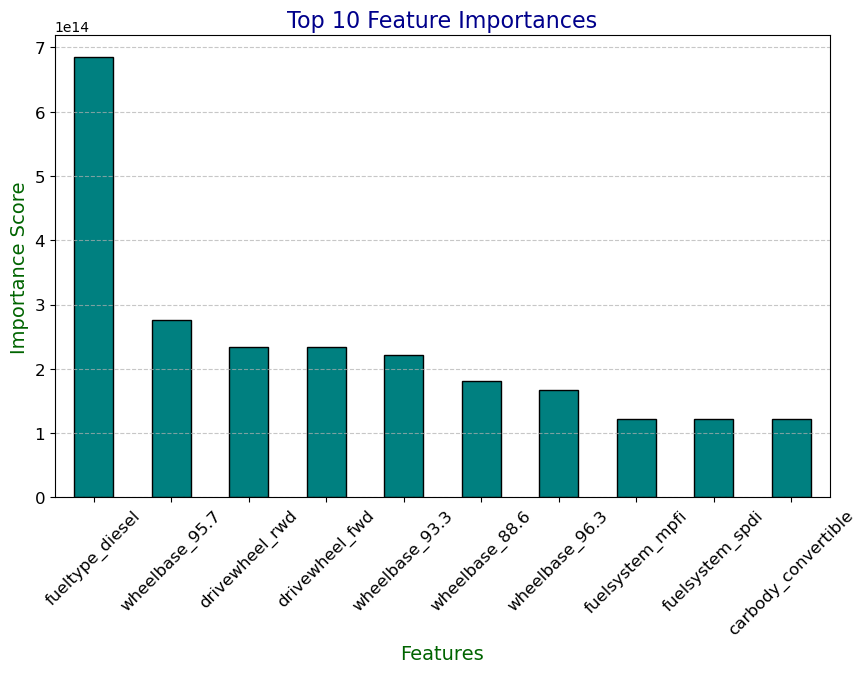

In [116]:
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Feature Importances', fontsize=16, color='darkblue')
plt.xlabel('Features', fontsize=14, color='darkgreen')
plt.ylabel('Importance Score', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, rotation=45, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()